In [1]:
import matplotlib.pyplot as plt
import numpy as np
from clustering.kmesar import *
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
import pandas as pd

In [2]:
df = pd.read_csv('./datasets/iris.csv')

print(df.head())

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
features = df.columns[2:-1]
X_orig = df[features]

print(f'Features: {features}')

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_orig), columns=features)

print('Scaled dataset:')
print(X_scaled.head())

Features: Index(['Petal_Length', 'Petal_Width'], dtype='object')
Scaled dataset:
   Petal_Length  Petal_Width
0      0.067797     0.041667
1      0.067797     0.041667
2      0.050847     0.041667
3      0.084746     0.041667
4      0.067797     0.041667


In [4]:
X_scaled_arr = np.array(X_scaled)
print(X_scaled_arr.shape)
print(X_scaled_arr[:5, :])

(150, 2)
[[0.06779661 0.04166667]
 [0.06779661 0.04166667]
 [0.05084746 0.04166667]
 [0.08474576 0.04166667]
 [0.06779661 0.04166667]]


n_labels = 2, k_centroids = 3
Reinitializing one centroid ...
n_labels = 2, k_centroids = 3
Reinitializing one centroid ...
n_labels = 2, k_centroids = 3
Reinitializing one centroid ...
n_labels = 2, k_centroids = 3
Reinitializing one centroid ...
n_labels = 2, k_centroids = 3
Reinitializing one centroid ...
n_labels = 3, k_centroids = 4
Reinitializing one centroid ...
n_labels = 3, k_centroids = 4
Reinitializing one centroid ...
n_labels = 3, k_centroids = 4
Reinitializing one centroid ...
n_labels = 2, k_centroids = 4
Reinitializing one centroid ...
n_labels = 3, k_centroids = 4
Reinitializing one centroid ...
n_labels = 3, k_centroids = 4
Reinitializing one centroid ...
n_labels = 3, k_centroids = 4
Reinitializing one centroid ...
n_labels = 3, k_centroids = 4
Reinitializing one centroid ...
n_labels = 2, k_centroids = 4
Reinitializing one centroid ...
n_labels = 3, k_centroids = 4
Reinitializing one centroid ...
n_labels = 3, k_centroids = 4
Reinitializing one centroid ...
n_labels

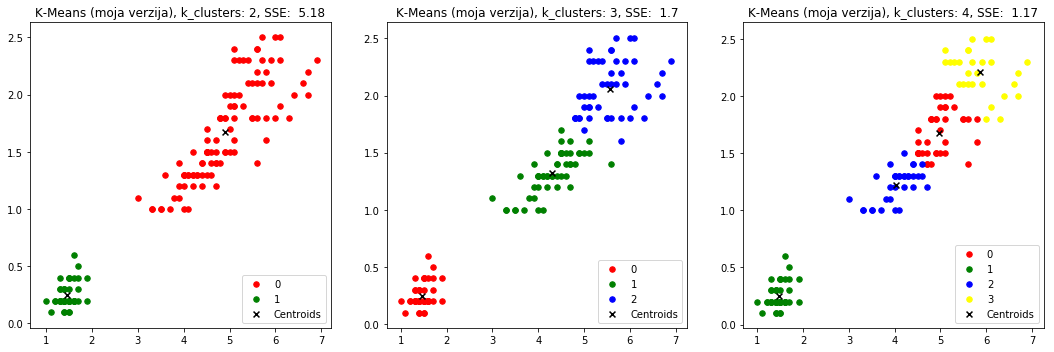

In [8]:
k_clusters = [2, 3, 4]
colors = ['red', 'green', 'blue', 'yellow', 'm', 'plum', 'brown']
fig = plt.figure(figsize=(15, 5))
plt_subplot_index = 1

for k in k_clusters:
    est = KMeansStandard(k_clusters=k)
    est.fit(X_scaled)

    df['label'] = est.labels_

    fig.add_subplot(1, 3, plt_subplot_index)

    for cluster_label in range(k):
        cluster_subsample = df.loc[df['label'] == cluster_label]
        plt.scatter(cluster_subsample['Petal_Length'], cluster_subsample['Petal_Width'],
                    s=30, c=colors[cluster_label], marker='o', label=f'{cluster_label}')

    centroids = pd.DataFrame(scaler.inverse_transform(est.centroids_), columns=features)
    plt.scatter(centroids['Petal_Length'], centroids['Petal_Width'], c='black', s=35, marker='x', label='Centroids')

    plt.legend(loc='lower right')
    plt.title(f'K-Means (moja verzija), k_clusters: {k}, SSE: {est.inertia_ : .3}', fontsize=12)

    plt_subplot_index += 1

plt.tight_layout()
plt.show()